<a href="https://colab.research.google.com/github/robinr1998/Homework1/blob/main/Project4_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the
import pandas as pd
application_df = pd.read_csv("/content/sample_data/order_data.csv")
application_df.head()

,CustomerID,TotalPrice,TotalOrders,Recency,Cluster
0,12346.0,77183.60,1.0,325.0,1
1,12347.0,4310.00,182.0,366.0,3
2,12348.0,1797.24,31.0,357.0,3
3,12349.0,1757.55,73.0,18.0,0
4,12350.0,334.40,17.0,309.0,3


In [17]:
# Drop the non-beneficial ID columns
columns_to_drop = ['CustomerID']
application_df.drop(columns=columns_to_drop, inplace=True)

In [18]:
# Determine the number of unique values in each column.
unique_value_counts = application_df.nunique()
unique_value_counts

,0
TotalPrice,4238
TotalOrders,460
Recency,358
Cluster,4


In [21]:
# Look at TotalPrice value counts to identify and replace with "Other"
total_price_counts = application_df['TotalPrice'].value_counts()
total_price_counts

,count
TotalPrice,
Other,4316
76.31999999999994,4
363.6500000000003,3
15.0,3
440.0,3
35.40000000000009,3
207.5,3
110.38000000000012,3


In [22]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value = 3
total_price_to_replace = application_df['TotalPrice'].value_counts()[application_df['TotalPrice'].value_counts() < cutoff_value].index

# Replace in dataframe
for app in total_price_to_replace:
    application_df['TotalPrice'] = application_df['TotalPrice'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['TotalPrice'].value_counts()

,count
TotalPrice,
Other,4316
76.31999999999994,4
363.6500000000003,3
15.0,3
440.0,3
35.40000000000009,3
207.5,3
110.38000000000012,3


In [25]:
# Look at TotalOrders value counts > 1 to identify and replace with "Other"
total_order_counts = application_df['TotalOrders'].value_counts()
total_order_counts2 = total_order_counts[total_order_counts > 1]
total_order_counts2

,count
TotalOrders,
10.0,78
11.0,74
6.0,73
9.0,72
5.0,72
...,...
305.0,2
349.0,2
619.0,2


In [26]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff_value = 50
total_orders_to_replace = application_df['TotalOrders'].value_counts()[application_df['TotalOrders'].value_counts() < cutoff_value].index


# Replace in dataframe
for cls in total_orders_to_replace:
    application_df['TotalOrders'] = application_df['TotalOrders'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['TotalOrders'].value_counts()

,count
TotalOrders,
Other,2751
10.0,78
11.0,74
6.0,73
9.0,72
5.0,72
8.0,71
1.0,71
15.0,68


In [28]:
# Look at Recency value counts to identify and replace with "Other"
recency_counts = application_df['Recency'].value_counts()
recency_counts

,count
Recency,
372.0,83
371.0,77
368.0,73
365.0,72
366.0,68
...,...
306.0,1
47.0,1
131.0,1


In [31]:
# Choose a cutoff value and create a list of Recency types to be replaced
# use the variable name `affiliation_types_to_replace`
cutoff_value = 50
recency_types_to_replace = application_df['Recency'].value_counts()[application_df['Recency'].value_counts() < cutoff_value].index

# Replace in dataframe
for app in recency_types_to_replace:
    application_df['Recency'] = application_df['Recency'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['Recency'].value_counts()

,count
Recency,
Other,3849
372.0,83
371.0,77
368.0,73
365.0,72
366.0,68
364.0,63
367.0,53


In [32]:
# Look at Cluster value counts to identify and replace with "Other"
cluster_type_counts = application_df['Cluster'].value_counts()
cluster_type_counts

,count
Cluster,
3,2636
0,1684
1,14
2,4


In [46]:
# Drop additional columns:
columns_to_drop = ['TotalPrice']
application_df.drop(columns=columns_to_drop, inplace=True)

In [47]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(application_df, dtype=int)
dummies.head()

,Cluster,TotalOrders_1.0,TotalOrders_2.0,TotalOrders_3.0,TotalOrders_5.0,TotalOrders_6.0,TotalOrders_7.0,TotalOrders_8.0,TotalOrders_9.0,TotalOrders_10.0,...,TotalOrders_31.000000000000007,TotalOrders_Other,Recency_364.0,Recency_365.0,Recency_366.0,Recency_367.0,Recency_368.0,Recency_371.0,Recency_372.0,Recency_Other
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
# Split our preprocessed data into our features and target arrays
y = dummies['Cluster'].values
X = dummies.drop(columns='Cluster').values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [49]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [52]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add the input layer
nn_model.add(tf.keras.layers.Input(shape=(34,)))

# Add our first Dense layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu"))

# Add our second Dense layer
nn_model.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 80)                  │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 30)                  │           2,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,261 (20.55 KB)

 Trainable params: 5,261 (20.55 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1035 - loss: 0.0476
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0027 - loss: -10.7158
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0026 - loss: -61.3215
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0027 - loss: -217.2944
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0046 - loss: -541.6426
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0021 - loss: -1064.0071
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0022 - loss: -1810.9866
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0039 - loss: -3077.9612
Epoch 9/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0033 - loss: -4377.7783
Epoch 10/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0017 - loss: -6283.4771
Epoch 11/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0030 - loss: -9145.1289
Epoch 1

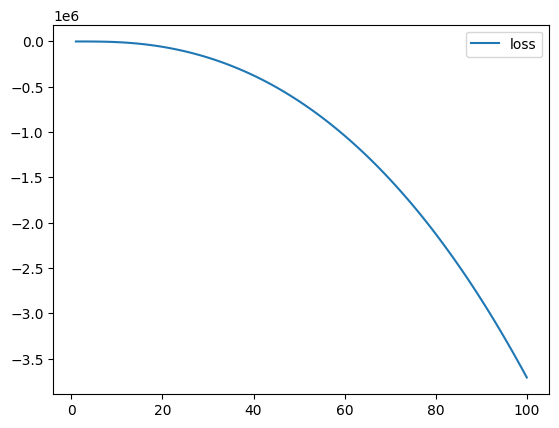

In [54]:
import matplotlib.pyplot as plt
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

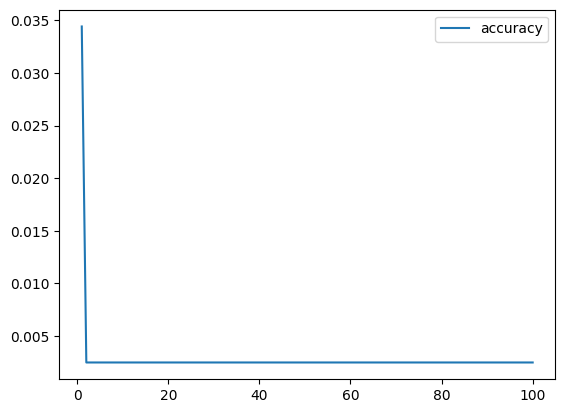

In [55]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [56]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

34/34 - 0s - 9ms/step - accuracy: 0.0055 - loss: -4.4618e+06
Loss: -4461815.5, Accuracy: 0.005529954098165035


In [ ]:
# Export our model to HDF5 file
filepath = r"C:\Users\robin\OneDrive\Documents\Homework\Module_21\deep-learning-challenge\AlphabetSoupCharity_Optimization_3.keras"
nn_model.save(filepath)